# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

# Load json data:

# Set url string
url = 'data/world_bank_projects.json'

# Load json data into list json_data
with open(url) as json_file:
    json_data = json.load(json_file)

# Load json data into pandas dataframe df
df = pd.read_json(url)

## 1. Find the 10 countries with most projects

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Mozambique            11
Burkina Faso           9
Name: countryshortname, dtype: int64


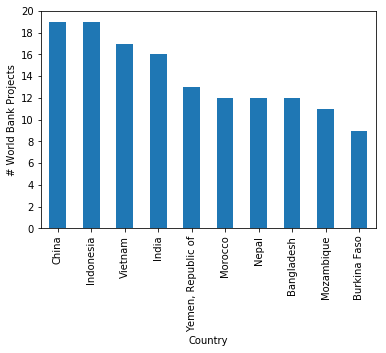

In [9]:
# Must filter projects with the country listed as 'Africa' as Africa is not a country
df_countries_only = df[df.countryshortname != 'Africa']

# Use value_counts to determine most common countries listed in the 'country short name' column
print(df_countries_only.countryshortname.value_counts().head(10))

# Plot series as bar graph
df_countries_only.countryshortname.value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('# World Bank Projects')
plt.yticks(np.arange(0, 21, step=2))
plt.show()

# 10 countries with the most projects:

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64


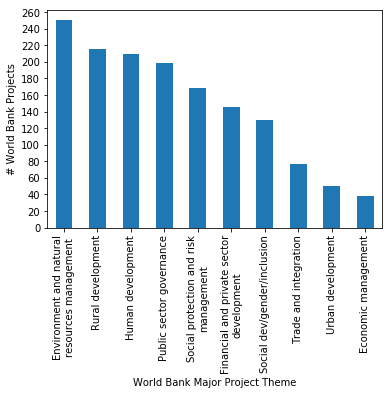

In [10]:
# Use json_normalize to extract nested dictionary data
jnorm=json_normalize(json_data, 'mjtheme_namecode')

# Convert jnorm to pandas dataframe
df1 = pd.DataFrame(jnorm)

# Sort by code and name to have each set of missing values for each code # be at the top of each code # block
# Backfill using .replace to fill in missing name values
df1 = df1.sort_values(by=['code', 'name']).replace('',method='bfill')

# Count values of names in df and show the top 10 major project themes 
print(df1.name.value_counts().head(10))

# Plot series as bar graph
df1.name.value_counts().head(10).plot(kind='bar')
plt.xlabel('World Bank Major Project Theme')
labels = list(df1.name.value_counts().head(10).index)
labels = ['\n'.join(wrap(l, 30)) for l in labels]
plt.xticks(range(10), labels)
plt.ylabel('# World Bank Projects')
plt.yticks(np.arange(0, 261, step=20))
plt.show()

# Top 10 major project themes:

In [11]:
# Creating a complete dataframe with missing values:

# First determine major theme codes and associated names

# Initilize empty dictionary
themes = {}

# For each dictionary of each row in the 'mjtheme_namecode' column, check if the code value is already in themes
# and if the name value is not blank - if these two statements are true, add the code value and name value as the
# keys and values in the themes dictionary
for row in df.mjtheme_namecode:
    for dict in row:
        if (dict['code'] not in themes) & (dict['name'] != ''):
            themes[dict['code']] = dict['name']

In [12]:
# Initialize complete dataframe using existing dataframe
df_theme_complete = df

# For each dictionary of each row in the 'mjtheme_namecode' column, check if the value of the key 'name'
# is a blank string - if so, fill it with the associated name value from themes dictionary
for row in df_theme_complete.mjtheme_namecode:
    for dict in row:
        if dict['name'] == '':
            dict['name'] = themes[dict['code']]

# Confirm empty name values were filled in            
empty_count = 0                        
for row in df_theme_complete.mjtheme_namecode:
    for dict in row:
        if dict['name'] == '':
            empty_count += 1   
            
if empty_count != 0:
    print('Empty name values not removed')

# Dataframe df_theme_complete is the original dataframe with the missing values filled in for the dictionaries
# in the 'mjtheme_namecode' column

In [13]:
# Determine the counts of the major theme codes
# This method is alternative to the above solution where the major theme counts were also determined

# Initialize empty counts dictionary
themes_count = {}

# For each dictionary of each row in the 'mjtheme_namecode' column, check if the dictionary value of name is
# in the themes_count dictionary as a key - if so, add to the count, if not, add the name to the dictionary as a key
for row in df_theme_complete.mjtheme_namecode:
    for dict in row:
        if dict['name'] in themes_count:
            themes_count[dict['name']] += 1
        else:
            themes_count[dict['name']] = 1
            
themes_count_df = pd.DataFrame(themes_count.items(), columns=['Theme', 'Count'])

themes_count_df.sort_values('Count', ascending=False).reset_index(drop=True).head(10)

,Theme,Count
0,Environment and natural resources management,250
1,Rural development,216
2,Human development,210
3,Public sector governance,199
4,Social protection and risk management,168
5,Financial and private sector development,146
6,Social dev/gender/inclusion,130
7,Trade and integration,77
8,Urban development,50
9,Economic management,38
